# Линейная регрессия


Линейные методы предполагают, что между признаками объекта и целевой переменной существует линейная зависимость, то есть:
$$ \hat{y} = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b,$$
где $\hat{y}$ - целевая переменная (что мы хотим предсказать), $x_i$ - i-ый признак объекта $x$, $w_i$ - вес $i$-го признака, $b$ - bias (смещение, свободный член).

В задаче линейной регрессии $\hat{y}$ - это действительное число.

Часто для упрощения записи вводят дополнительный фиктивный признак $x_0$, который всегда равен 1, тогда bias - вес этого признака. В этом случае формула может быть записана как скалярное произведение:
$$ \hat{y} = <w, x> $$

В матричной форме формулу можно переписать следующим образом:
$$ \hat{y} = Xw,$$
$\hat{y}$ - вектор значений целевой переменной размера $n$, $X$ - матрица значений признаков объектов размера $n \times k$, w - вектор весов размера $k$. То есть в наших данных имеется $n$ объектов, каждый их которых описан $k$ признаками.

Таким образом, в матричной форме модель задаётся следующим образом:
$$ y = Xw + \epsilon$$

Важно отметить, что параметрами этой модели являются веса $w$. Когда говорят об обучении какого-либо алгоритма машинного обучения, как правило, имеют в виду настройку весов, т.е. параметров модели.  

На практике $\hat{y} $ может отличается от реальных значений, которые принимает целевая переменная $y$. Разницу между реальным значением и предсказанным, обозначим как $\epsilon$ - вектор значений случайной переменной, соответствующая случайной, непрогнозируемой ошибке модели. Ограничения, которые накладываются на эту модель:
* математическое ожидание случайных ошибок $\epsilon$ равно нулю,
* дисперсия случайных ошибок одинакова и конечна,
* случайные ошибки не скоррелированы.

Один из способов вычислить значения параметров модели, давно знаком - это наименьших квадратов, который минимизирует среднеквадратичную ошибку между реальным значением зависимой переменной и прогнозом, выданным моделью. Решение по методу наименьших квадратов дает:
$$ w = (X^TX)^{-1}X^TY $$

Загрузим необходимые библиотеки

In [81]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Оценка результатов

Чтобы оценить качество работы алгоритма нам необходимо применяют разные метрики. Наиболее частые метрики средневадратичная и средняя абсолютная ошибки. Вычислим эти метрики на обучающей и на тестовой выборках.

 * *mean_absolute_error* - средняя абсолютная ошибка $|y_i - \hat{y}_i|$
 * *mean_squared_error* - средняя квадратичная ошибка $(y_i - \hat{y}_i)^2$

## Задание 3.1

Пример 1. Сгенерируем искусственные данные. Сначала поработаем с простейшим одномерным случаем, когда у нас значение $y$ будет зависеть только от одного значения $x$.




In [82]:
def generate_data(n_points=20):
  """
    Принимает на вход n_points точек
    Возвращает данные для обучения и теста
  """
  X = np.linspace(-5, 5, n_points)
  y = 10 * X - 7

  X_train = X[0::2].reshape(-1, 1)
  y_train = y[0::2] + np.random.randn(int(n_points/2)) * 10

  X_test = X[1::2].reshape(-1, 1)
  y_test = y[1::2] + np.random.randn(int(n_points/2)) * 10

  print(f'Generated {len(X_train)} train samples and {len(X_test)} test samples')
  return X, X_train, y_train, X_test, y_test

In [83]:
X, X_train, y_train, X_test, y_test = generate_data(100)

Generated 50 train samples and 50 test samples


In [84]:
### Реализуйте настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE. Сравните с результатами из sklearn

from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_absolute_error as mae,
    mean_squared_error as mse
)

def least_squares(X, Y):
    return np.linalg.inv(X.T @ X) @ X.T @ Y

def add_bias_parameter(X):
    return np.hstack((X, np.ones((X.shape[0], 1))))

x_train = add_bias_parameter(X_train)
x_test = add_bias_parameter(X_test)

w = least_squares(x_train, y_train)

print(f'my linear regression result: y = {w[0]}x + {w[0]}')
print(f'train mae: {mae(y_train, x_train @ w)}')
print(f'train mse: {mse(y_train, x_train @ w)}')

print(f'test mae: {mae(y_test, x_test @ w)}')
print(f'test mse: {mse(y_test, x_test @ w)}')

my linear regression result: y = 10.025522930178163x + 10.025522930178163
train mae: 8.881853777053061
train mse: 121.89514993691898
test mae: 7.528498495210957
test mse: 80.62412483120072


In [85]:
reg_train = LinearRegression().fit(X_train, y_train)

w = [*reg_train.coef_, reg_train.intercept_]

print(f'sklearn linear regression result: y = {w[0]}x + {w[0]}')
print(f'train mae: {mae(y_train, x_train @ w)}')
print(f'train mse: {mse(y_train, x_train @ w)}')

print(f'test mae: {mae(y_test, x_test @ w)}')
print(f'test mse: {mse(y_test, x_test @ w)}')

sklearn linear regression result: y = 10.025522930178163x + 10.025522930178163
train mae: 8.881853777053063
train mse: 121.89514993691898
test mae: 7.528498495210955
test mse: 80.62412483120073


## Задание 3.2

Пример 2. Не всегда в задаче регрессии в качестве решения выступает прямая, как в предыдущем случае. Рассмотрим ещё один пример, в котором у объектов всё ещё один признак. Но теперь мы будм брать случайную точку на синусоиде и добавлять к ней шум — таким образом получим целевую переменную, признаком в этом случае будет координата $x$.

In [86]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # выберем некоторое количество точек из промежутка от 0 до 2*pi
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # для каждой посчитаем значение sin(x) + 1
    # это будет ground truth
    data['values'] = np.sin(data['support']) + 1
    # из support посемплируем некоторое количество точек с возвратом, это будут признаки
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # опять посчитаем sin(x) + 1 и добавим шум, получим целевую переменную
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

data = generate_wave_set(1000, 250)

In [87]:
x_axis_values = data['support']
ground_truth_values = data['values']
X_train, y_train = data['x_train'], data['y_train']
X_train = X_train.reshape(-1, 1)
x_train = add_bias_parameter(X_train)

w = least_squares(x_train, y_train)

print(f'train mae: {mae(y_train, x_train @ w)}')
print(f'train mse: {mse(y_train, x_train @ w)}')

train mae: 0.437250540522434
train mse: 0.26934039874058857


Конечно, такое решение нас вряд ли может устроить. Нужно применить полинимиальную регрессию. Идея здесь такая. Каждый признак в исходную формулу может входить не только в первой степени, но и во второй, в третьей и так далее. То есть для случая, когда у нас только один признак:
$$ \widehat{y} = w_1 x_1 + w_2 x_1^2 + ... + w_k x_1^k + b,$$

## Задание 3.3

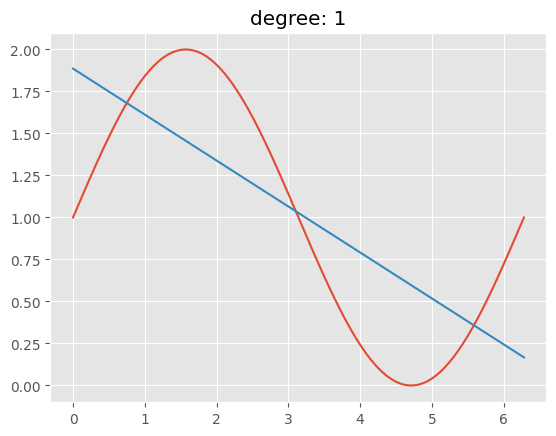

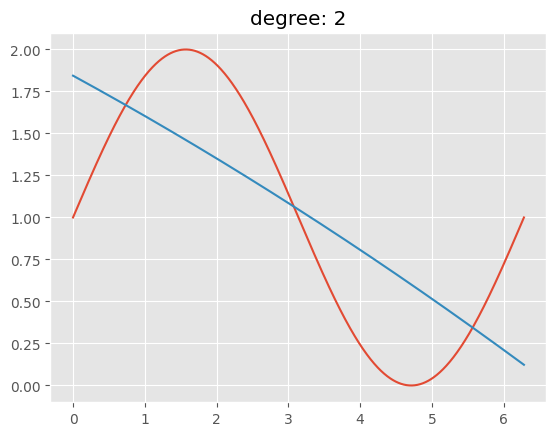

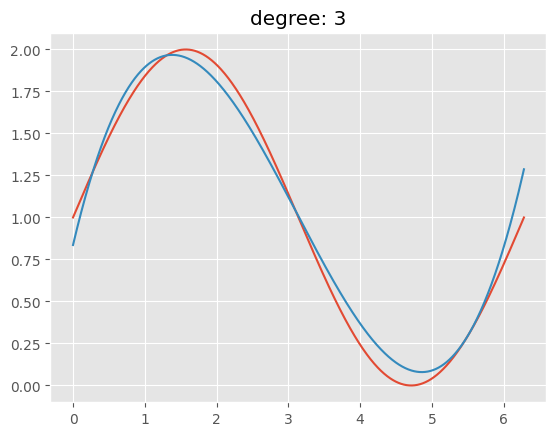

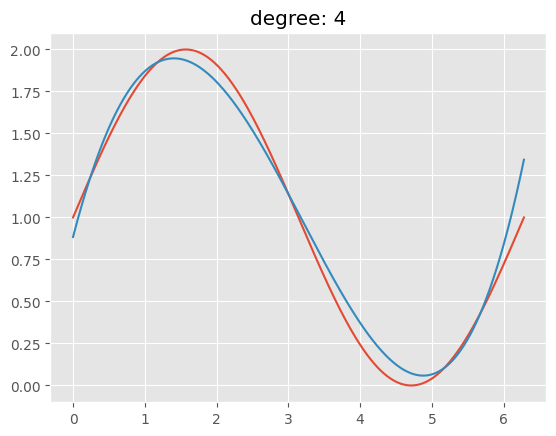

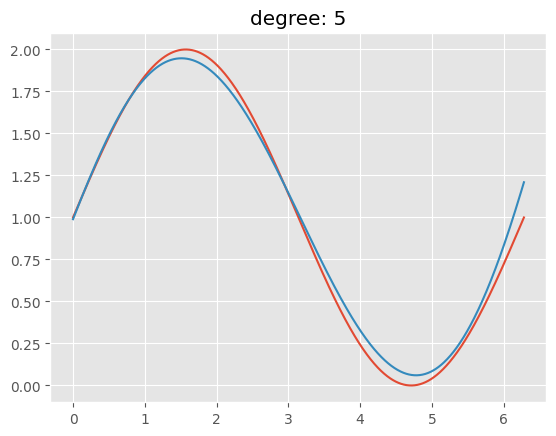

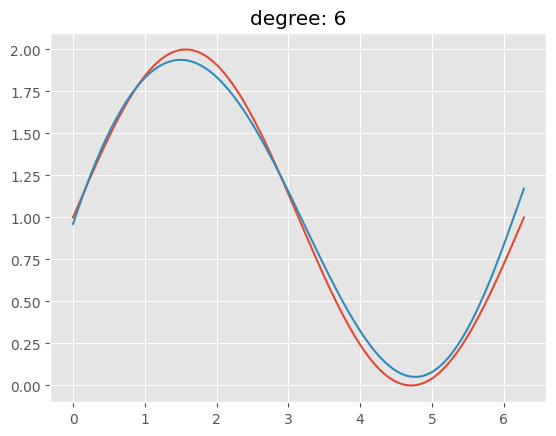

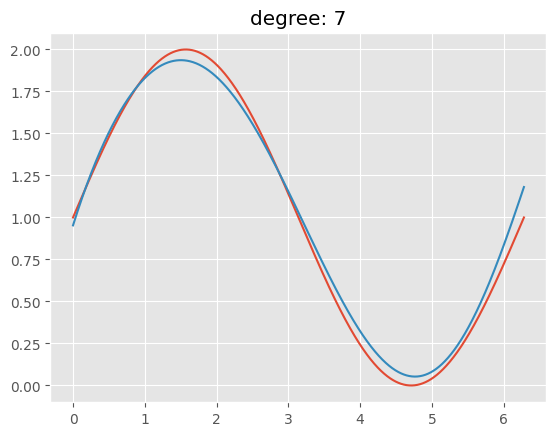

Best degree: 5 (MSE=-0.05)


In [88]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

### Реализуйте полиномиальную регрессию. Сделайте визуализацию для полиномов разных степеней.
### Полином какой степени подходит больше других? Почему?

def polynomial_regression(x_train, x_test, y_train, y_test, max_degree=5, plot=False):
    if len(x_train.shape) == 1: # transform each case to np.array
        x_train = x_train.reshape(-1, 1)
    if len(x_test.shape) == 1:
        x_test = x_test.reshape(-1, 1)
    
    best_score = -float('inf')
    best_degree = None
    best_model = None

    for degree in range(1, max_degree+1):
        poly_features = PolynomialFeatures(degree=degree)
        x_train_poly = poly_features.fit_transform(x_train)
        x_test_poly = poly_features.fit_transform(x_test)
        model = LinearRegression()
        model.fit(x_train_poly, y_train)
        y_pred = model.predict(x_test_poly)
        score = -mae(y_test, y_pred)
        if score > best_score:
            best_score = score
            best_degree = degree
            best_model = model

        if plot:          
            plt.figure()
            plt.plot(x_test, y_test)
            plt.plot(x_test, y_pred)
            plt.title(f"degree: {degree}")
            plt.show()

    return best_model, best_degree, best_score

_, best_degree, best_score = polynomial_regression(
    X_train, 
    x_axis_values, 
    y_train, 
    ground_truth_values,
    max_degree=7,
    plot=True)

print(f"Best degree: {best_degree} (MSE={best_score:.2f})")

Лучший результат достигнут со степенью 5 т.к. дальнейшее увеличение степени способствует overfitting-гу.

# Реальный датасет

Возьмём реальный набор данных Boston из sklearn.datasets. Этот датасет описывает средние цены на недвижимость в районах Бостона в тысячах долларов.

Примеры признаков объектов недвижимости: количество преступлений на душу населения, процент старых домов в районе, количество учеников на одного учителя и т.д. Обратите внимание на то, что данные уже оцифрованы там, где изначально признаки были качественными.

Загрузим датасет, выведем информацию

In [89]:
from sklearn.datasets import load_boston

Возьмите датасет отсюда: https://www.kaggle.com/datasets/vikrishnan/boston-house-prices/

In [90]:
house_data = load_boston()

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California 

## Задание 3.4

In [91]:
### оставьте в наборе данных только 7 наиболее значимых признаков
### настройте параметры линейной регрессии и сравните метрики качества (MSE и MAE) для полного датасета и усечённого

from itertools import combinations
from sklearn.model_selection import train_test_split

X = house_data['data']
Y = house_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

model, degree, _ = polynomial_regression(X_train, X_test, y_train, y_test, max_degree=7)
poly_features = PolynomialFeatures(degree=degree)
X_test_poly = poly_features.fit_transform(X_test)
y_pred = model.predict(X_test_poly)
print('model with all features')
print(f'mae: {mae(y_test, y_pred)}')
print(f'mse: {mse(y_test, y_pred)}', end='\n')

model with all features
mae: 3.5476388363808304
mse: 31.52817562191437


In [95]:

# CRIM     per capita crime rate by town
# ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS    proportion of non-retail business acres per town
# CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# NOX      nitric oxides concentration (parts per 10 million)
# RM       average number of rooms per dwelling
# AGE      proportion of owner-occupied units built prior to 1940
# DIS      weighted distances to five Boston employment centres
# RAD      index of accessibility to radial highways
# TAX      full-value property-tax rate per $10,000
# PTRATIO  pupil-teacher ratio by town
# B        1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
# LSTAT    % lower status of the population

all_features = house_data['feature_names']
selected_features = ['ZN', 'INDUS', 'AGE', 'DIS', 'RAD', 'B', 'LSTAT']

x_train = pd.DataFrame(X_train, columns=all_features)[list(selected_features)].to_numpy() 
x_test = pd.DataFrame(X_test, columns=all_features)[list(selected_features)].to_numpy() 

model, degree, score = polynomial_regression(
    x_train,
    x_test, 
    y_train,
    y_test,
    max_degree=7,
    plot=False)

poly_features = PolynomialFeatures(degree=degree)
x_test_poly = poly_features.fit_transform(x_test)
y_pred = model.predict(x_test_poly)
print(f'model with features {selected_features}')
print(f'mae: {mae(y_test, y_pred)}')
print(f'mse: {mse(y_test, y_pred)}', end='\n')

model with features ['ZN', 'INDUS', 'AGE', 'DIS', 'RAD', 'B', 'LSTAT']
mae: 3.6144207699478494
mse: 23.435547267163688
